### Importing the modules required for the data manipulation, ploting and applying mathematical & statistical analysis

In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, uniform
import numpy as np
from scipy import stats

In [14]:
df = pd.read_csv('bike_buyers_clean.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [15]:
df.shape

(1000, 13)

In [16]:
df.dtypes

ID                   int64
Marital Status      object
Gender              object
Income               int64
Children             int64
Education           object
Occupation          object
Home Owner          object
Cars                 int64
Commute Distance    object
Region              object
Age                  int64
Purchased Bike      object
dtype: object

In [17]:
df.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [18]:
columns = ['ID', 'Marital_Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home_Owner', 'Cars', 'Commute_Distance', 'Region', 'Age',
       'Purchased_Bike']
df.columns = columns

In [19]:
categorical_features = ['Marital_Status', 'Gender', 'Education',
       'Occupation', 'Home_Owner', 'Commute_Distance', 'Region','Purchased_Bike']

for i in categorical_features:
    print(i)
    print(df[i].unique())

Marital_Status
['Married' 'Single']
Gender
['Female' 'Male']
Education
['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
Occupation
['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
Home_Owner
['Yes' 'No']
Commute_Distance
['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' '10+ Miles']
Region
['Europe' 'Pacific' 'North America']
Purchased_Bike
['No' 'Yes']


In [20]:
commute_map = {'0-1 Miles':0.5, '2-5 Miles':2.5, '5-10 Miles':7.5, '1-2 Miles':2.5, '10+ Miles':10.0}
df['Commute_Distance'] = [commute_map[miles] for miles in df['Commute_Distance']]

df['Purchased_Bike'] = df['Purchased_Bike'].replace({'Yes': 1, 'No': 0})
df

,ID,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owner,Cars,Commute_Distance,Region,Age,Purchased_Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0.5,Europe,42,0
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0.5,Europe,43,0
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2.5,Europe,60,0
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,7.5,Pacific,41,1
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0.5,Europe,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2.5,North America,54,1
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2.5,North America,35,1
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0.5,North America,38,1
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,2.5,North America,38,0


In [21]:
numerical_features = ['Income', 'Children', 'Cars', 'Commute_Distance', 'Age']
target_variable = ['Purchased_Bike']

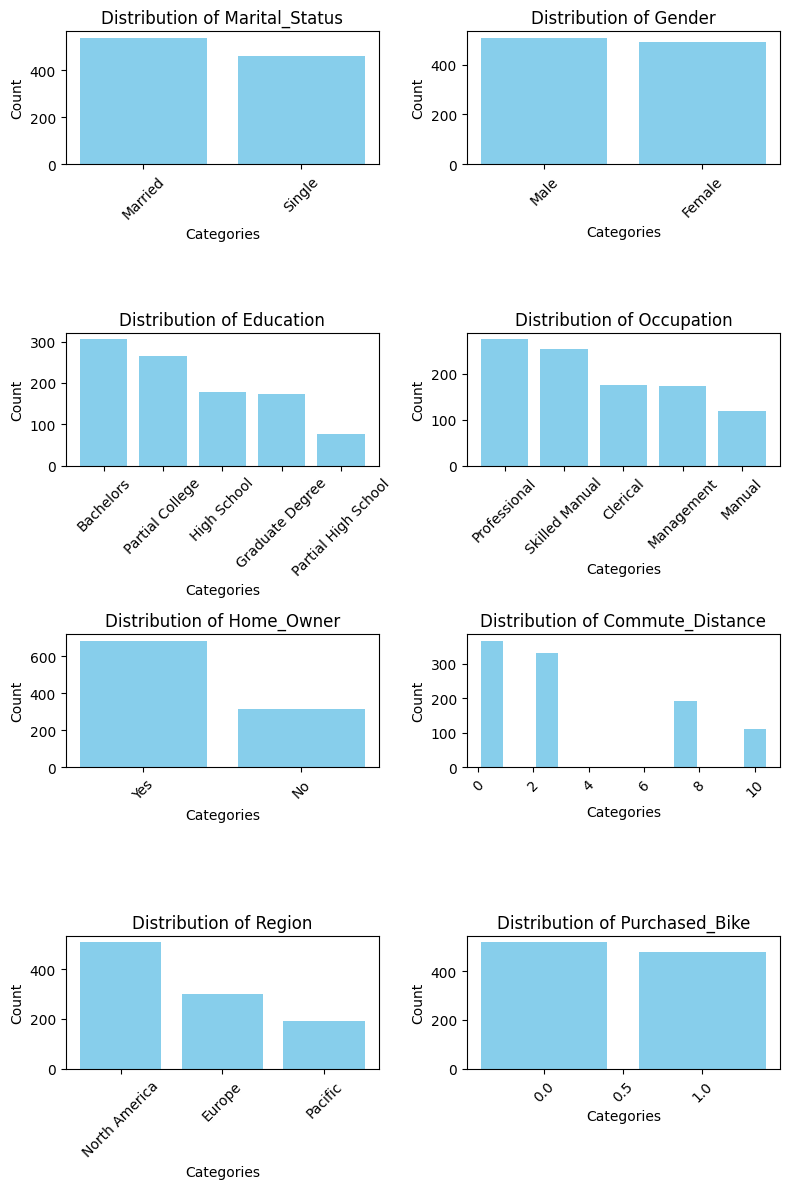

In [22]:
fig, axes = plt.subplots(4, 2, figsize=(8, 12))
axes = axes.flatten()  

for i, feature in enumerate(categorical_features):
    category_counts = df[feature].value_counts()
    
    axes[i].bar(category_counts.index, category_counts.values, color='skyblue')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

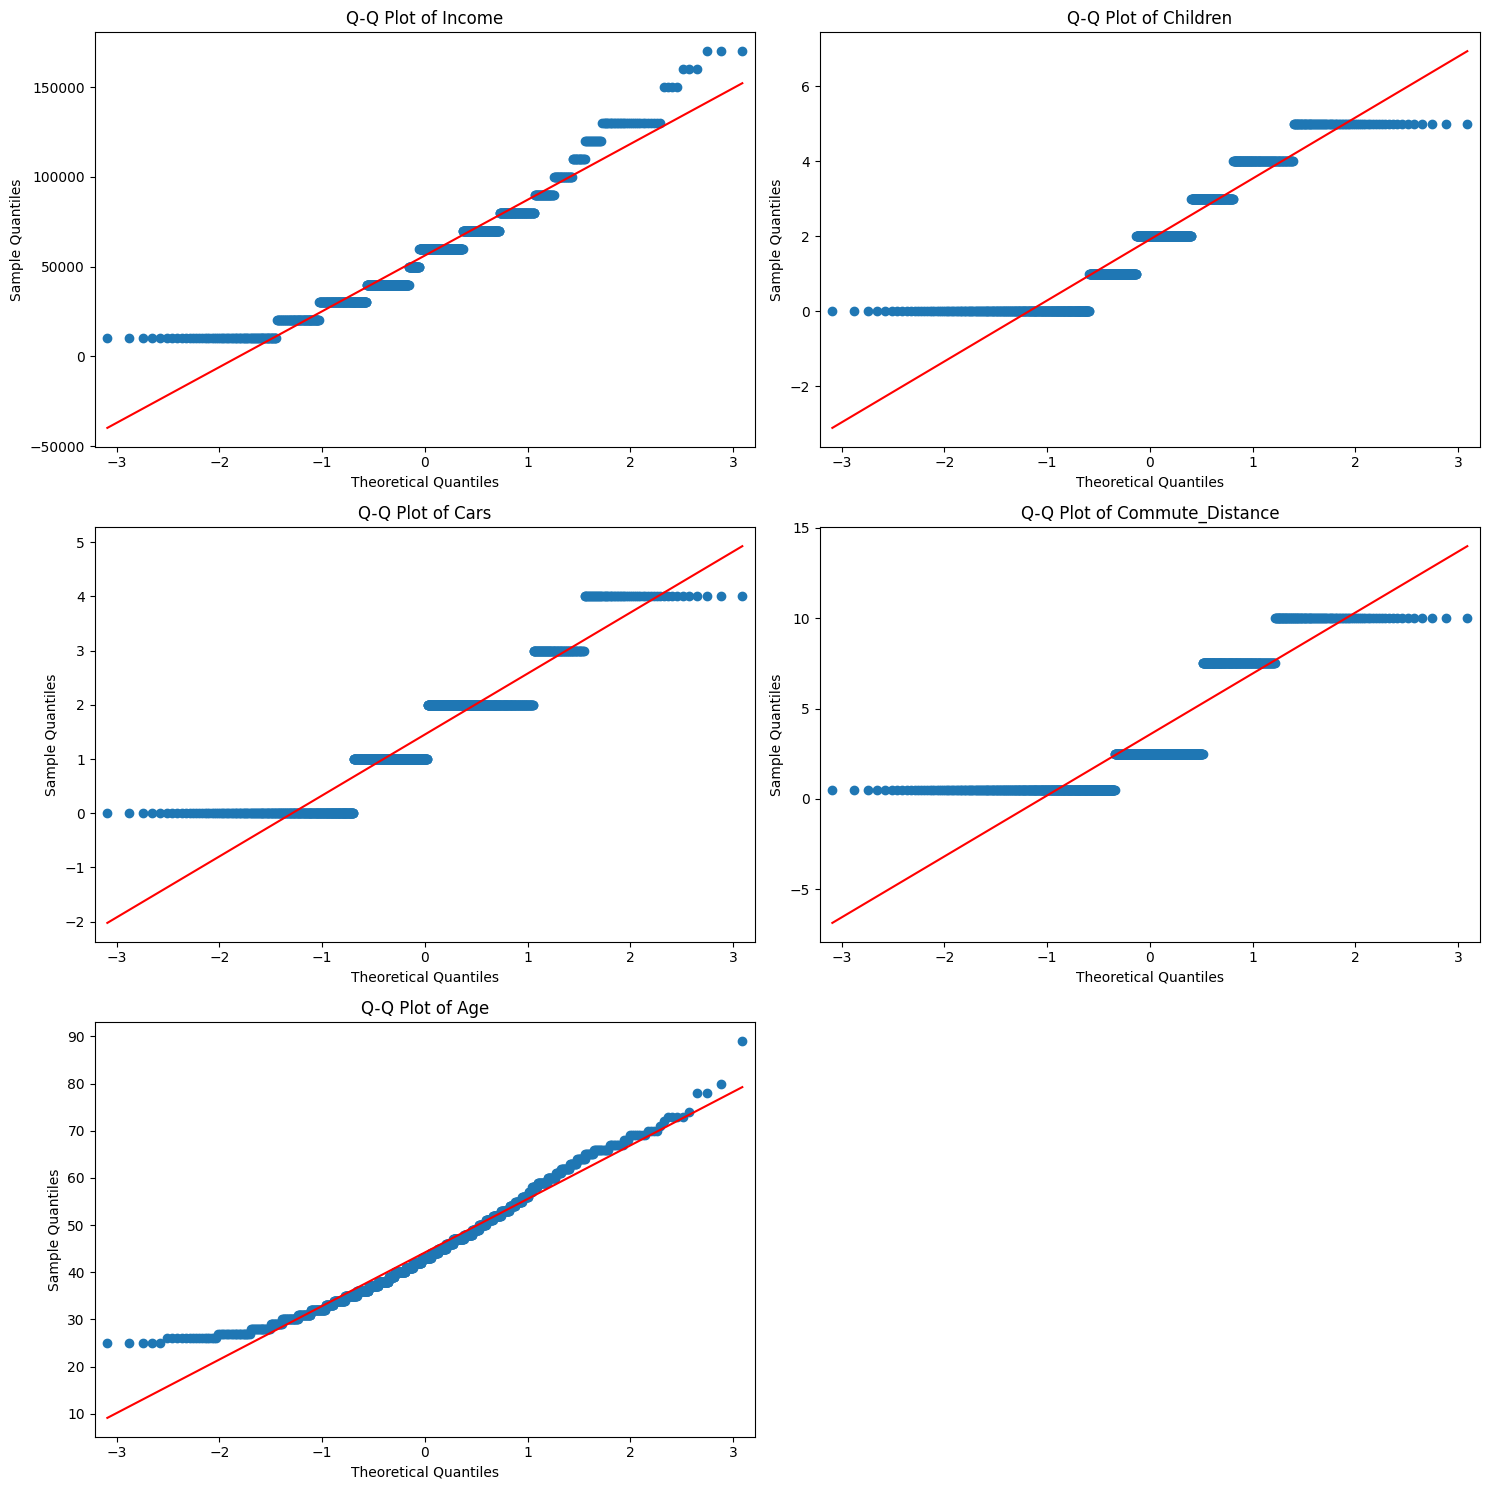

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    qqplot(df[feature], line='s', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot of {feature}')

if len(numerical_features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

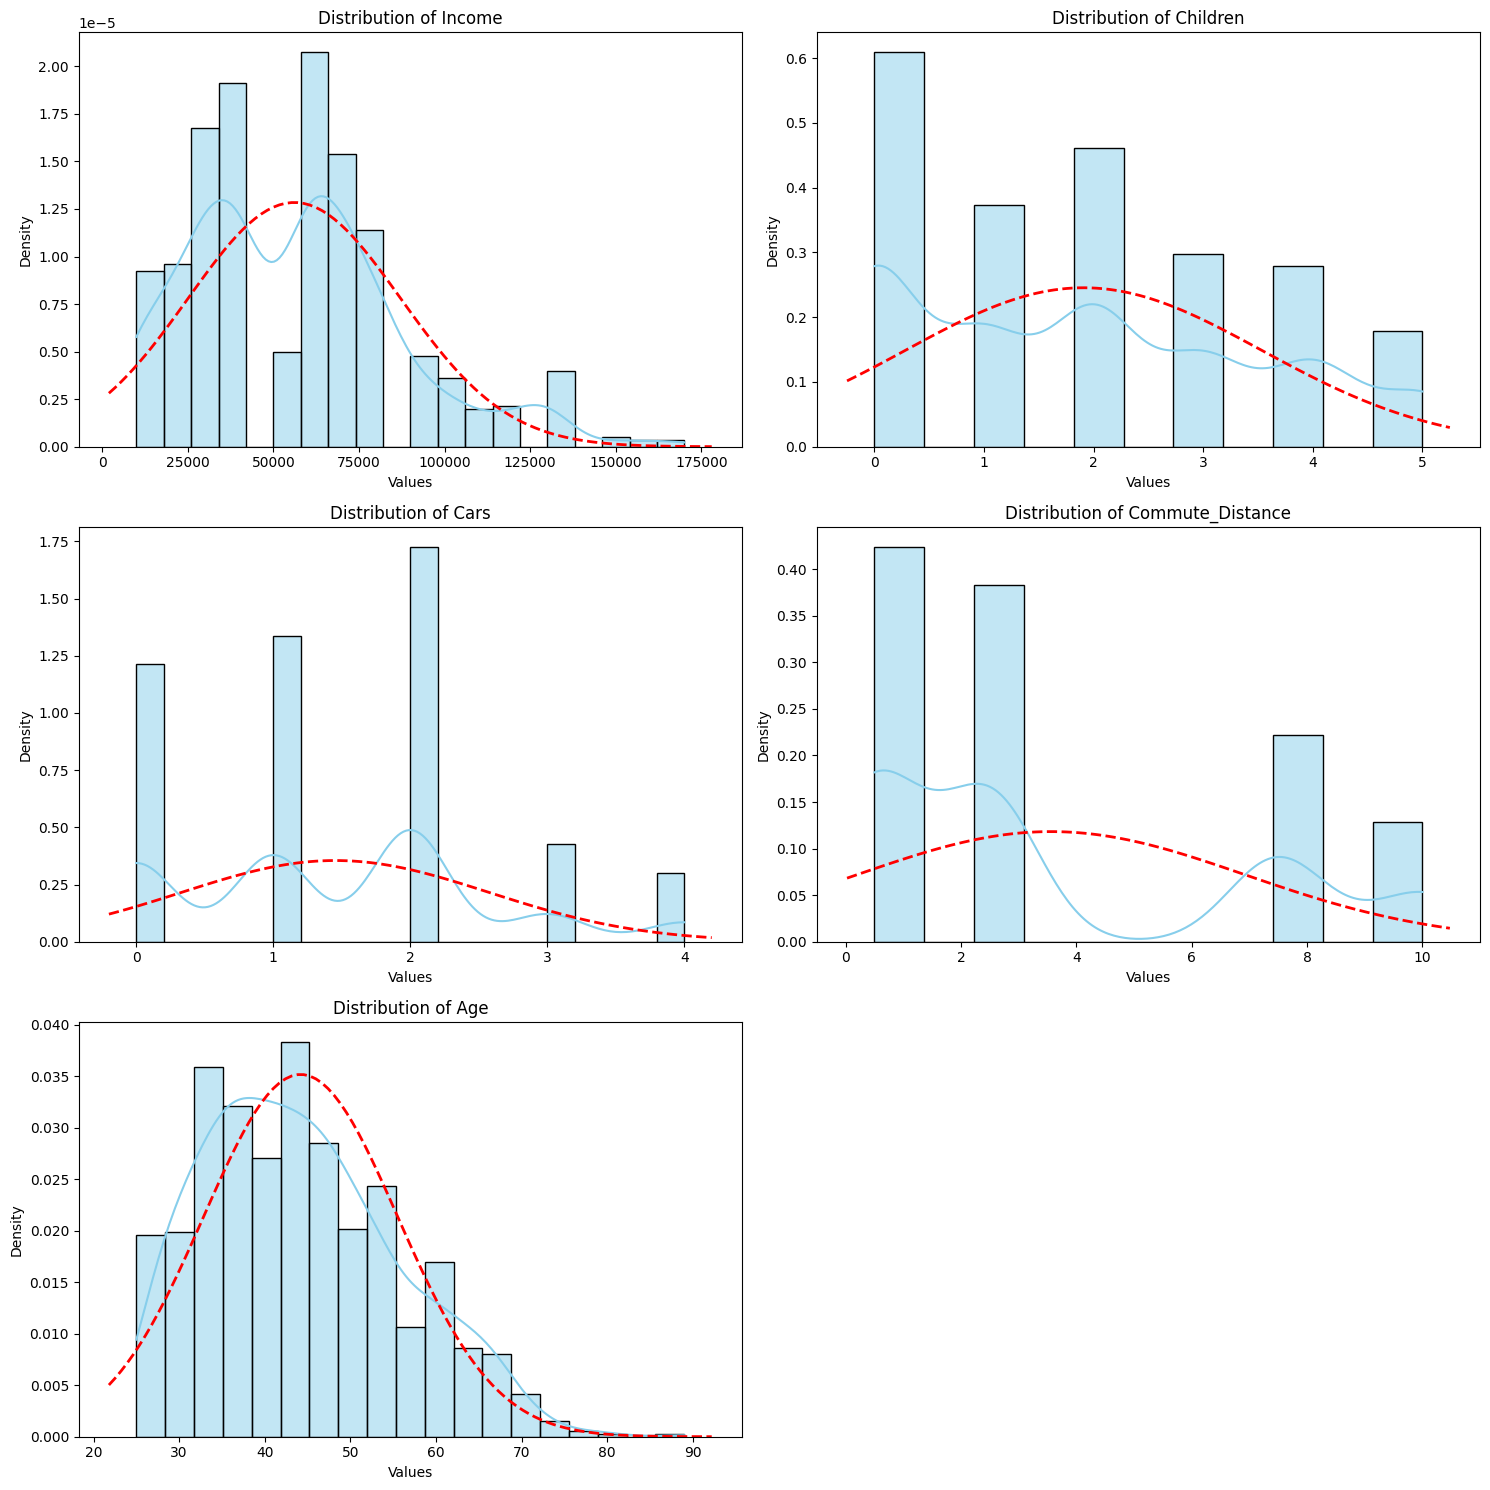

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i], color='skyblue', stat='density')
    
    mean, std_dev = np.mean(df[feature]), np.std(df[feature])
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mean, std_dev)
    axes[i].plot(x, y, color='red', linestyle='--', linewidth=2)
    
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Density')
    
if len(numerical_features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

#### Continuous, Numerical and Normal - Income - Z test

In [36]:
income_SD = np.std(df['Income'])
income_bike_yes = df[df['Purchased_Bike'] == 1]['Income']
income_bike_no = df[df['Purchased_Bike'] == 0]['Income']

mean_income_yes = np.mean(income_bike_yes)
mean_income_no = np.mean(income_bike_no)
num_yes = len(income_bike_yes)
num_no = len(income_bike_no)

z_stat = (mean_income_yes - mean_income_no) / (income_SD * np.sqrt(1/num_yes + 1/num_no))

p_value = 2 * (1 - norm.cdf(np.abs(z_stat)))

alpha = 0.05
print(f'Z-statistic: {z_stat:.2f}')
print(f'P-value: {p_value:.4f}')

if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in mean income between those who purchased a bike and those who didn\'t.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in mean income between those who purchased a bike and those who didn\'t.')

Z-statistic: 1.34
P-value: 0.1810
Fail to reject the null hypothesis: There is no significant difference in mean income between those who purchased a bike and those who didn't.
